<a href="https://colab.research.google.com/github/JGuevaraR/Data-practices/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### All the excercises presented in this repository are available in the book "A hands-on introduction to Data Science" by Chirag Shah.#
## Multiple linear regression:
this excercise is based in the _try it yourself 5.5_ using the **All Greens Franchise** dataset available [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr05.html).


The data (X1, X2, X3, X4, X5, X6) are for each franchise store.

* X1 = annual net sales/1000 dollars
* X2 = number sq. ft./1000  
* X3 = inventory/1000 dollars
* X4 = amount spent on advertizing/$1000
* X5 = size of sales district/1000 families
* X6 = number of competing stores in district

first, we will import the librarys that we are going to use.
 Unlike the base exercise, we are not going to use the _statsmodel_ library, instead, we will use the famous _sci-kit learn_ library.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

next, lets import the dataset and do the first analysis

In [2]:
#import the dataset
df = pd.read_excel("https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr05.xls")

#start the first analysis
df.describe()

,X1,X2,X3,X4,X5,X6
count,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000
mean,286.574074,3.325926,387.481481,8.10000,9.692593,7.740741
std,192.061724,2.011045,191.167742,3.77451,5.140033,4.895780
min,0.500000,0.500000,102.000000,2.50000,1.600000,0.000000
25%,98.500000,1.400000,204.000000,4.80000,4.500000,4.000000
50%,341.000000,3.500000,382.000000,8.10000,11.300000,8.000000
75%,450.500000,4.750000,551.000000,10.95000,14.050000,12.000000
max,570.000000,8.600000,788.000000,17.40000,16.299999,15.000000


As we can see, our dataset is full, with numerical values, next we will define our predictors and target

In [3]:
#define target:
y = df.X1
#define our features column's name, and then asign variables for the dataset with such features
features = ["X2","X3","X4","X5","X6"]
X = df[features]

Next step is to plot our data, looking for preliminar correlations

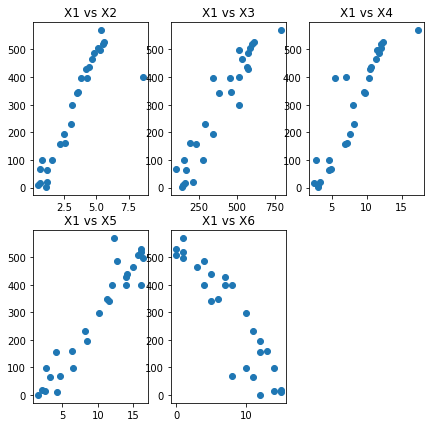

In [4]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.scatter(df[features[i]],y)
  plt.title("X1 vs {}".format(features[i]))
  plt.gcf().set_size_inches(7,7)

evidently, there is a correlation, let's see in a quantitative way how strong it is

In [5]:
#correlation between X1(annual net sales) and any other variable
for feature in features:
  print("{}: {}".format(feature,np.corrcoef(df[feature],y)[0,1]))

X2: 0.8940920808046883
X3: 0.9455036254761464
X4: 0.9140240746000747
X5: 0.9536830603539991
X6: -0.9122363921094576


## eureka

we have a quite strong correlation between our anual net sales and the other variables presented, so we can start our model

In [6]:
#use all of our predictors to the model
X = df[features] 

#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y)

#create our model
regr = linear_model.LinearRegression().fit(X_train,y_train)

#make predictions
predictions = regr.predict(X_test)

let's see our performance

In [7]:
#see our performance
mean_absolute_error(y_test,predictions)

28.668746351359157

In [8]:
#other performance measure
regr.score(X_test,y_test)

0.9487565070902645

as we can see, our performance was so good, this could be because of the strong correlation between our target and predictors, see the data plotted could be convenient

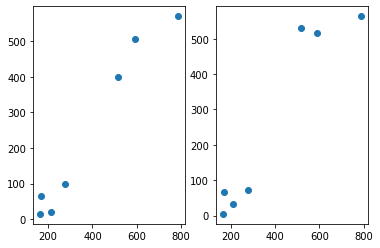

In [9]:
plt.subplot(1,2,1)
plt.scatter(X_test.X3,y_test)
plt.subplot(1,2,2)
plt.scatter(X_test.X3,predictions)

# conclusions:  
as we can see our model had almost a perfect performance according with our measures, the Data exploration and the previous analysis let us to find any type of outlier or noisy data, taht was not our case, but always is important have this type of routines in order to create a good model, capable to generalize, and predict in a aproppiate way